In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [2]:
sns.set()


# setup 

In [3]:
train_data=pd.read_excel(r"C:\code\archive\Data_Train.xlsx")

In [4]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
1,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
2,IndiGo,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
4,IndiGo,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
...,...,...,...,...,...,...,...,...,...,...,...
9838,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
9839,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
9840,IndiGo,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
9841,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
1,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
2,IndiGo,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
4,IndiGo,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9843 entries, 0 to 9842
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          9843 non-null   object
 1   Date_of_Journey  9843 non-null   object
 2   Source           9843 non-null   object
 3   Destination      9843 non-null   object
 4   Route            9842 non-null   object
 5   Dep_Time         9843 non-null   object
 6   Arrival_Time     9843 non-null   object
 7   Duration         9843 non-null   object
 8   Total_Stops      9842 non-null   object
 9   Additional_Info  9843 non-null   object
 10  Price            9843 non-null   int64 
dtypes: int64(1), object(10)
memory usage: 846.0+ KB


In [7]:
train_data["Duration"].value_counts()

2h 50m     478
2h 45m     337
1h 30m     292
2h 55m     280
2h 35m     266
          ... 
33h 45m      1
27h 30m      1
13h 35m      1
28h 30m      1
31h 30m      1
Name: Duration, Length: 368, dtype: int64

In [8]:
train_data.isnull().sum

<bound method NDFrame._add_numeric_operations.<locals>.sum of       Airline  Date_of_Journey  Source  Destination  Route  Dep_Time  \
0       False            False   False        False  False     False   
1       False            False   False        False  False     False   
2       False            False   False        False  False     False   
3       False            False   False        False  False     False   
4       False            False   False        False  False     False   
...       ...              ...     ...          ...    ...       ...   
9838    False            False   False        False  False     False   
9839    False            False   False        False  False     False   
9840    False            False   False        False  False     False   
9841    False            False   False        False  False     False   
9842    False            False   False        False   True     False   

      Arrival_Time  Duration  Total_Stops  Additional_Info  Price  
0    

In [9]:
train_data.dropna(inplace = True)

In [10]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.shape

(9842, 11)

## adding date month hour minute 

In [12]:
train_data["date"] = pd.to_datetime(train_data.Date_of_Journey , format="%d/%m/%Y").dt.day

In [13]:
train_data["month"] = pd.to_datetime(train_data.Date_of_Journey , format="%d/%m/%Y").dt.month

In [14]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month
0,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
1,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
2,IndiGo,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3
4,IndiGo,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,Air India,9/06/2019,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100,9,6
9838,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
9839,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
9840,IndiGo,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4


In [15]:
train_data=train_data.drop(["Date_of_Journey"],axis=1)

In [16]:
train_data

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month
0,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
1,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
2,IndiGo,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3
3,IndiGo,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3
4,IndiGo,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3
...,...,...,...,...,...,...,...,...,...,...,...,...
9837,Air India,Mumbai,Hyderabad,BOM → HYD,06:20,07:40,1h 20m,non-stop,No info,3100,9,6
9838,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
9839,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
9840,IndiGo,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4


In [17]:
train_data["dep_hour"]=pd.to_datetime(train_data.Dep_Time).dt.hour

In [18]:
train_data["dep_min"]=pd.to_datetime(train_data.Dep_Time).dt.minute

In [19]:
train_data=train_data.drop(["Dep_Time"],axis=1)

In [20]:
train_data

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,date,month,dep_hour,dep_min
0,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
1,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50
2,IndiGo,Banglore,New Delhi,BLR → BOM → DEL,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55
3,IndiGo,Banglore,New Delhi,BLR → BOM → DEL,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,8,0
4,IndiGo,Banglore,New Delhi,BLR → BOM → DEL,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,Air India,Mumbai,Hyderabad,BOM → HYD,07:40,1h 20m,non-stop,No info,3100,9,6,6,20
9838,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,9,4,19,55
9839,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
9840,IndiGo,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20


In [21]:
train_data["arr_hour"]=pd.to_datetime(train_data.Arrival_Time).dt.hour

In [22]:
train_data["arr_min"]=pd.to_datetime(train_data.Arrival_Time).dt.minute


In [23]:
train_data=train_data.drop(["Arrival_Time"], axis=1 )


# Assigning and converting Duration column into list 

In [24]:
duration = list(train_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]          

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))

In [25]:
train_data["Duration_hours"] = duration_hours
train_data["Duration_mins"] = duration_mins

In [26]:
train_data

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,date,month,dep_hour,dep_min,arr_hour,arr_min,Duration_hours,Duration_mins
0,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
1,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45
2,IndiGo,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10,25,15,30
3,IndiGo,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,1,3,8,0,5,5,21,5
4,IndiGo,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10,25,25,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,Air India,Mumbai,Hyderabad,BOM → HYD,1h 20m,non-stop,No info,3100,9,6,6,20,7,40,1,20
9838,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,19,55,22,25,2,30
9839,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20,2,35
9840,IndiGo,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20,3,0


In [27]:
train_data.drop(["Duration"],axis=1,inplace=True)

# onehot encoding

In [28]:
train_data.describe()

,Price,date,month,dep_hour,dep_min,arr_hour,arr_min,Duration_hours,Duration_mins
count,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000,9842.000000
mean,9448.834078,13.454989,4.716318,12.516054,23.910282,13.526417,24.629648,10.897582,28.128429
std,4385.239400,8.467950,1.167070,5.740147,18.706760,6.844831,16.705076,8.522162,17.225132
min,1840.000000,1.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6015.000000,6.000000,3.000000,8.000000,5.000000,8.000000,10.000000,3.000000,15.000000
50%,8877.000000,12.000000,5.000000,12.000000,25.000000,14.000000,25.000000,9.000000,30.000000
75%,12689.250000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000,16.000000,45.000000
max,54826.000000,27.000000,6.000000,23.000000,55.000000,23.000000,55.000000,47.000000,55.000000


In [29]:
train_data["Airline"].value_counts()

IndiGo               5902
Air India            1751
Multiple carriers    1196
Vistara               479
Air Asia              319
GoAir                 194
Trujet                  1
Name: Airline, dtype: int64

In [30]:
Airline=train_data["Airline"]

In [31]:
Airline=pd.get_dummies(Airline,drop_first=True)

In [32]:
Airline


,Air India,GoAir,IndiGo,Multiple carriers,Trujet,Vistara
0,0,0,1,0,0,0
1,0,0,1,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
9837,1,0,0,0,0,0
9838,0,0,0,0,0,0
9839,1,0,0,0,0,0
9840,0,0,1,0,0,0


In [33]:
train_data["Source"].value_counts()


Delhi       4434
Kolkata     2571
Banglore    2010
Mumbai       575
Chennai      252
Name: Source, dtype: int64

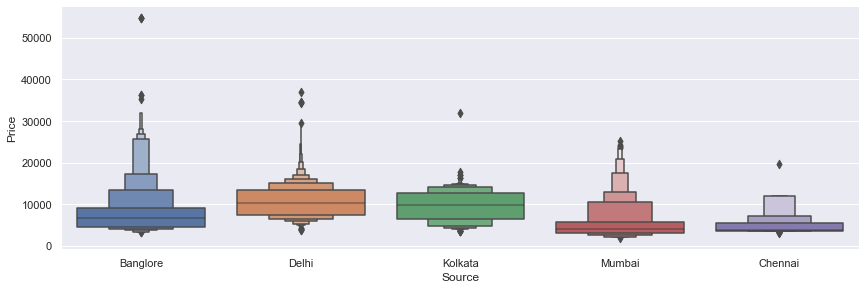

In [34]:
sns.catplot(y = "Price", x = "Source", data = train_data.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()

In [35]:
source = train_data[["Source"]]

In [36]:
source = pd.get_dummies(source, drop_first= True)

In [37]:
source

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,1,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
9837,0,0,0,1
9838,0,0,1,0
9839,0,0,1,0
9840,0,0,0,0


In [38]:
train_data["Destination"].value_counts()

Cochin       4434
Banglore     2571
Delhi        1127
New Delhi     883
Hyderabad     575
Kolkata       252
Name: Destination, dtype: int64

In [39]:
Destination = train_data[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,0,0,1
4,0,0,0,0,1


In [40]:
train_data["Route"]

0       CCU → NAG → BLR
1       BLR → NAG → DEL
2       BLR → BOM → DEL
3       BLR → BOM → DEL
4       BLR → BOM → DEL
             ...       
9837          BOM → HYD
9838          CCU → BLR
9839          CCU → BLR
9840          BLR → DEL
9841          BLR → DEL
Name: Route, Length: 9842, dtype: object

In [41]:
train_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [42]:
train_data["Total_Stops"].value_counts()

1 stop      5460
non-stop    2818
2 stops     1518
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [43]:
train_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [44]:
train_data

,Airline,Source,Destination,Total_Stops,Price,date,month,dep_hour,dep_min,arr_hour,arr_min,Duration_hours,Duration_mins
0,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
1,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45
2,IndiGo,Banglore,New Delhi,1,11087,12,3,18,55,10,25,15,30
3,IndiGo,Banglore,New Delhi,1,22270,1,3,8,0,5,5,21,5
4,IndiGo,Banglore,New Delhi,1,11087,12,3,8,55,10,25,25,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,Air India,Mumbai,Hyderabad,0,3100,9,6,6,20,7,40,1,20
9838,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,25,2,30
9839,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,20,2,35
9840,IndiGo,Banglore,Delhi,0,7229,27,4,8,20,11,20,3,0


In [45]:
data_train = pd.concat([train_data, Airline, source, Destination], axis = 1)

In [46]:
data_train

,Airline,Source,Destination,Total_Stops,Price,date,month,dep_hour,dep_min,arr_hour,...,Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,...,0,0,0,1,0,0,0,0,0,0
1,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,...,0,0,0,0,0,0,0,0,0,1
2,IndiGo,Banglore,New Delhi,1,11087,12,3,18,55,10,...,0,0,0,0,0,0,0,0,0,1
3,IndiGo,Banglore,New Delhi,1,22270,1,3,8,0,5,...,0,0,0,0,0,0,0,0,0,1
4,IndiGo,Banglore,New Delhi,1,11087,12,3,8,55,10,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9837,Air India,Mumbai,Hyderabad,0,3100,9,6,6,20,7,...,0,0,0,0,1,0,0,1,0,0
9838,Air Asia,Kolkata,Banglore,0,4107,9,4,19,55,22,...,0,0,0,1,0,0,0,0,0,0
9839,Air India,Kolkata,Banglore,0,4145,27,4,20,45,23,...,0,0,0,1,0,0,0,0,0,0
9840,IndiGo,Banglore,Delhi,0,7229,27,4,8,20,11,...,0,0,0,0,0,0,1,0,0,0


In [47]:
data_train=data_train.drop(["Airline","Source","Destination"],axis=1)

# test data set

In [48]:
test_data=pd.read_excel(r"C:\code\archive\Test_set.xlsx")

In [49]:
test_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,IndiGo,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2449,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2450,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2451,IndiGo,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2452,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


# preprocessing 

In [50]:
print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()

print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2454 entries, 0 to 2453
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2454 non-null   object
 1   Date_of_Journey  2454 non-null   object
 2   Source           2454 non-null   object
 3   Destination      2454 non-null   object
 4   Route            2454 non-null   object
 5   Dep_Time         2454 non-null   object
 6   Arrival_Time     2454 non-null   object
 7   Duration         2454 non-null   object
 8   Total_Stops      2454 non-null   object
 9   Additional_Info  2454 non-null   object
dtypes: object(10)
memory usage: 191.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

# EDA

In [51]:
# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   
        else:
            duration[i] = "0h " + duration[i]           

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))  
    
# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)


# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Airline
---------------------------------------------------------------------------
IndiGo               1407
Air India             440
Multiple carriers     346
Vistara               129
Air Asia               86
GoAir                  46
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1122
Kolkata      639
Banglore     507
Mumbai       145
Chennai       41
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       1122
Banglore      639
Delhi         282
New Delhi     225
Hyderabad     145
Kolkata        41
Name: Destination, dtype: int64


Shape of test data :  (2454, 23)


# feature selection


In [52]:
data_train.shape

(9842, 25)

In [53]:
data_train.columns

Index(['Total_Stops', 'Price', 'date', 'month', 'dep_hour', 'dep_min',
       'arr_hour', 'arr_min', 'Duration_hours', 'Duration_mins', 'Air India',
       'GoAir', 'IndiGo', 'Multiple carriers', 'Trujet', 'Vistara',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [54]:
X = data_train.loc[:,['Total_Stops', 'date', 'month', 'dep_hour', 'dep_min',
       'arr_hour', 'arr_min', 'Duration_hours', 'Duration_mins', 'Air India',
       'GoAir', 'IndiGo', 'Multiple carriers', 'Trujet', 'Vistara',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,date,month,dep_hour,dep_min,arr_hour,arr_min,Duration_hours,Duration_mins,Air India,...,Vistara,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,12,5,18,5,23,30,5,25,0,...,0,0,0,1,0,0,0,0,0,0
1,1,1,3,16,50,21,35,4,45,0,...,0,0,0,0,0,0,0,0,0,1
2,1,12,3,18,55,10,25,15,30,0,...,0,0,0,0,0,0,0,0,0,1
3,1,1,3,8,0,5,5,21,5,0,...,0,0,0,0,0,0,0,0,0,1
4,1,12,3,8,55,10,25,25,30,0,...,0,0,0,0,0,0,0,0,0,1


In [55]:
y = data_train.iloc[:, 1]
y.head()

0     6218
1    13302
2    11087
3    22270
4    11087
Name: Price, dtype: int64

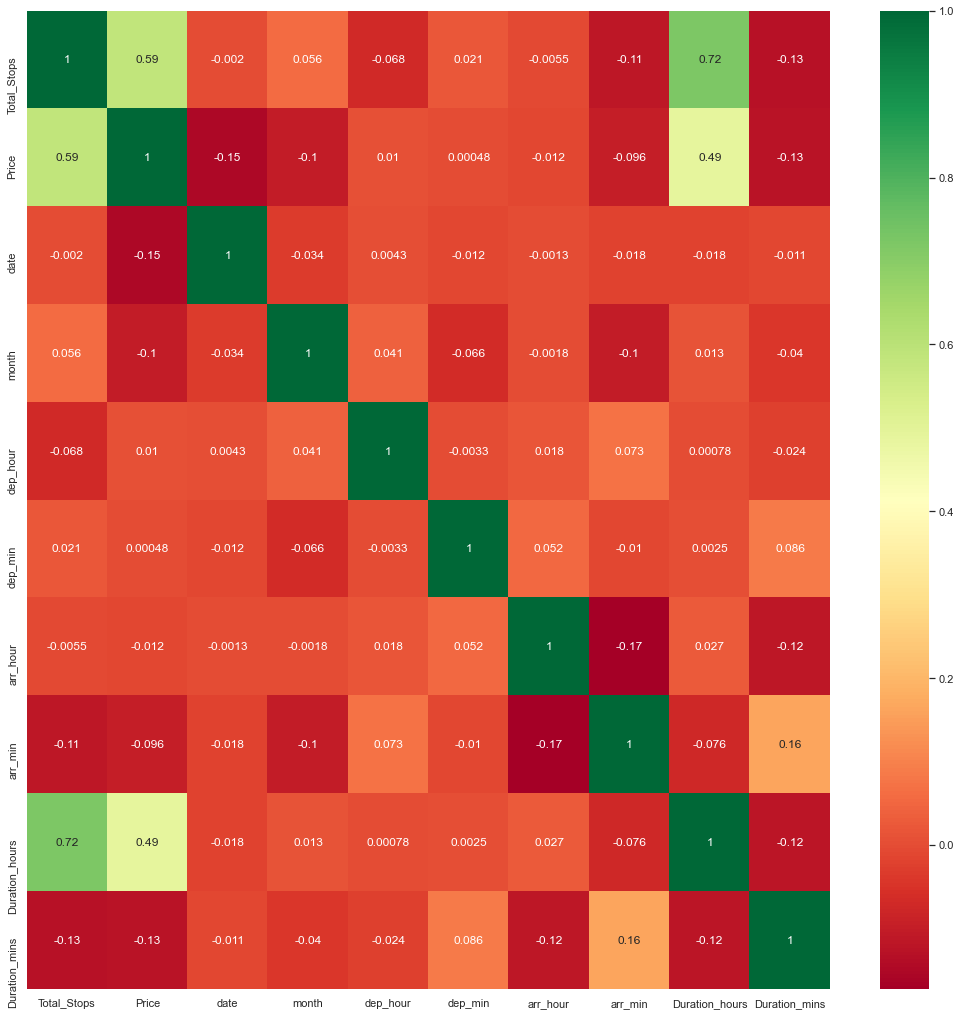

In [56]:
plt.figure(figsize = (18,18))
sns.heatmap(train_data.corr(), annot = True, cmap = "RdYlGn")

plt.show()

In [57]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [58]:
print(selection.feature_importances_)

[2.43048610e-01 1.72143871e-01 5.39300090e-02 3.71407017e-02
 3.33640046e-02 5.62394266e-02 3.48804665e-02 1.41388115e-01
 2.69731488e-02 1.10533521e-02 4.64080068e-03 2.85416716e-02
 1.13423919e-02 1.61896957e-04 4.07724932e-03 1.01912975e-03
 7.28848333e-03 7.64063632e-03 6.18814692e-03 5.85048575e-03
 6.99759412e-02 1.03460162e-02 1.11473777e-03 3.16507068e-02]


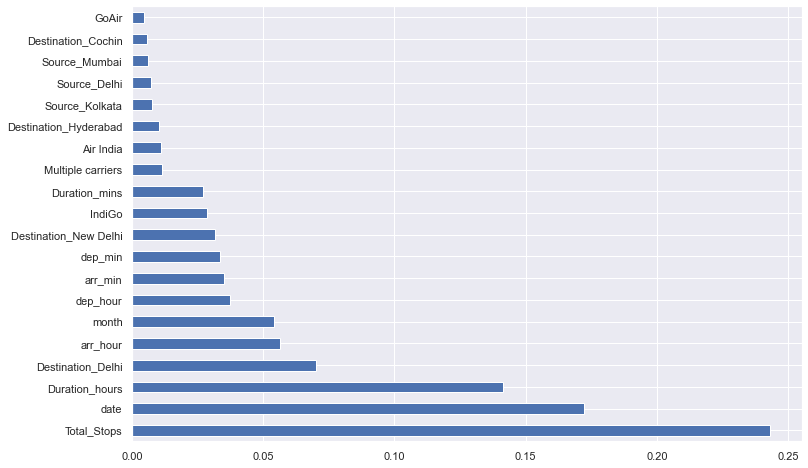

In [59]:
plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

# random forest

In [60]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [61]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [62]:
y_pred = reg_rf.predict(X_test)

In [63]:
reg_rf.score(X_train, y_train)

0.9492045134128451

In [64]:
reg_rf.score(X_test, y_test)

0.7361417003438124

c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


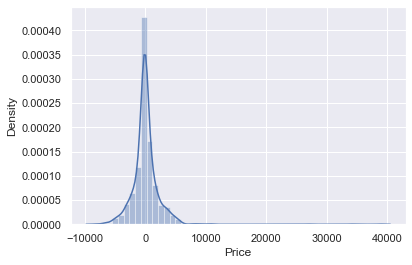

In [65]:
sns.distplot(y_test-y_pred)
plt.show()

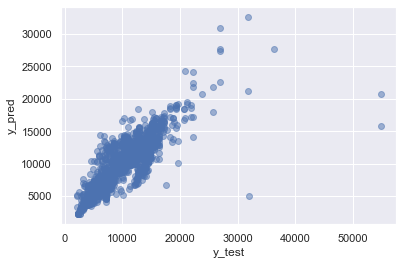

In [66]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

In [67]:
from sklearn import metrics

In [68]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1301.077033049987
MSE: 5356246.180969768
RMSE: 2314.3565371328955


In [69]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.03945477862076775

In [70]:
metrics.r2_score(y_test, y_pred)

0.7361417003438124

# hiperparameter  tuning

In [71]:
from sklearn.model_selection import RandomizedSearchCV

In [72]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [73]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [74]:
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [75]:
rf_random.fit(X_train,y_train)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   3.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   4.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [76]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [77]:
prediction = rf_random.predict(X_test)

c:\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


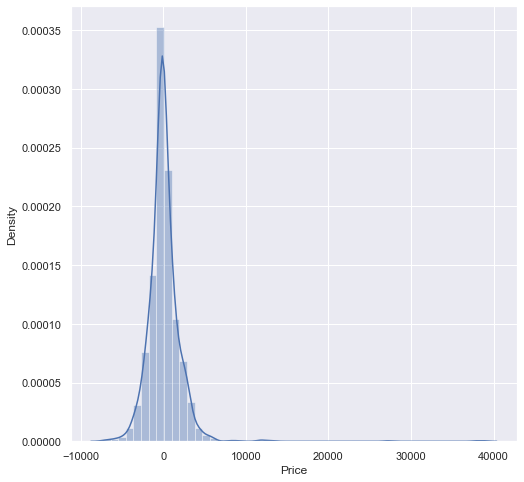

In [78]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

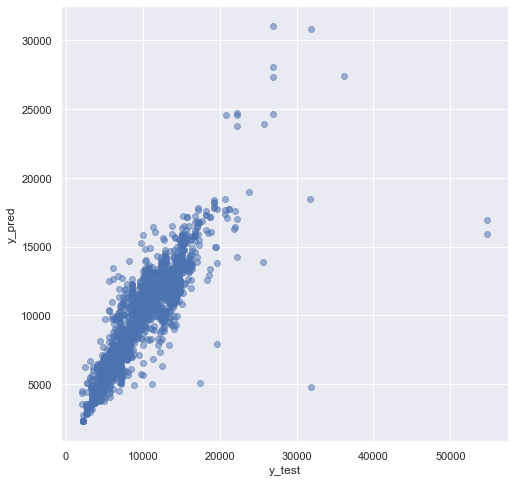

In [79]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

# pickle

In [80]:
import pickle
file = open('final_flight.pkl', 'wb')
pickle.dump(reg_rf, file)


In [81]:
model = open('final_flight.pkl','rb')
forest = pickle.load(model)

In [82]:
y_prediction = forest.predict(X_test)

In [83]:
metrics.r2_score(y_test, y_prediction)

0.7361417003438124